## 高密度线性细扫 (High-Density Linear Fine Scan) 图

<>:306: SyntaxWarning: invalid escape sequence '\e'
<>:306: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_3379/1541267077.py:306: SyntaxWarning: invalid escape sequence '\e'
  ax.annotate(f'Optimal Discretization Scale\n$\epsilon = {best_eps:.6f}$\nErrSum = {best_err:.4f}',


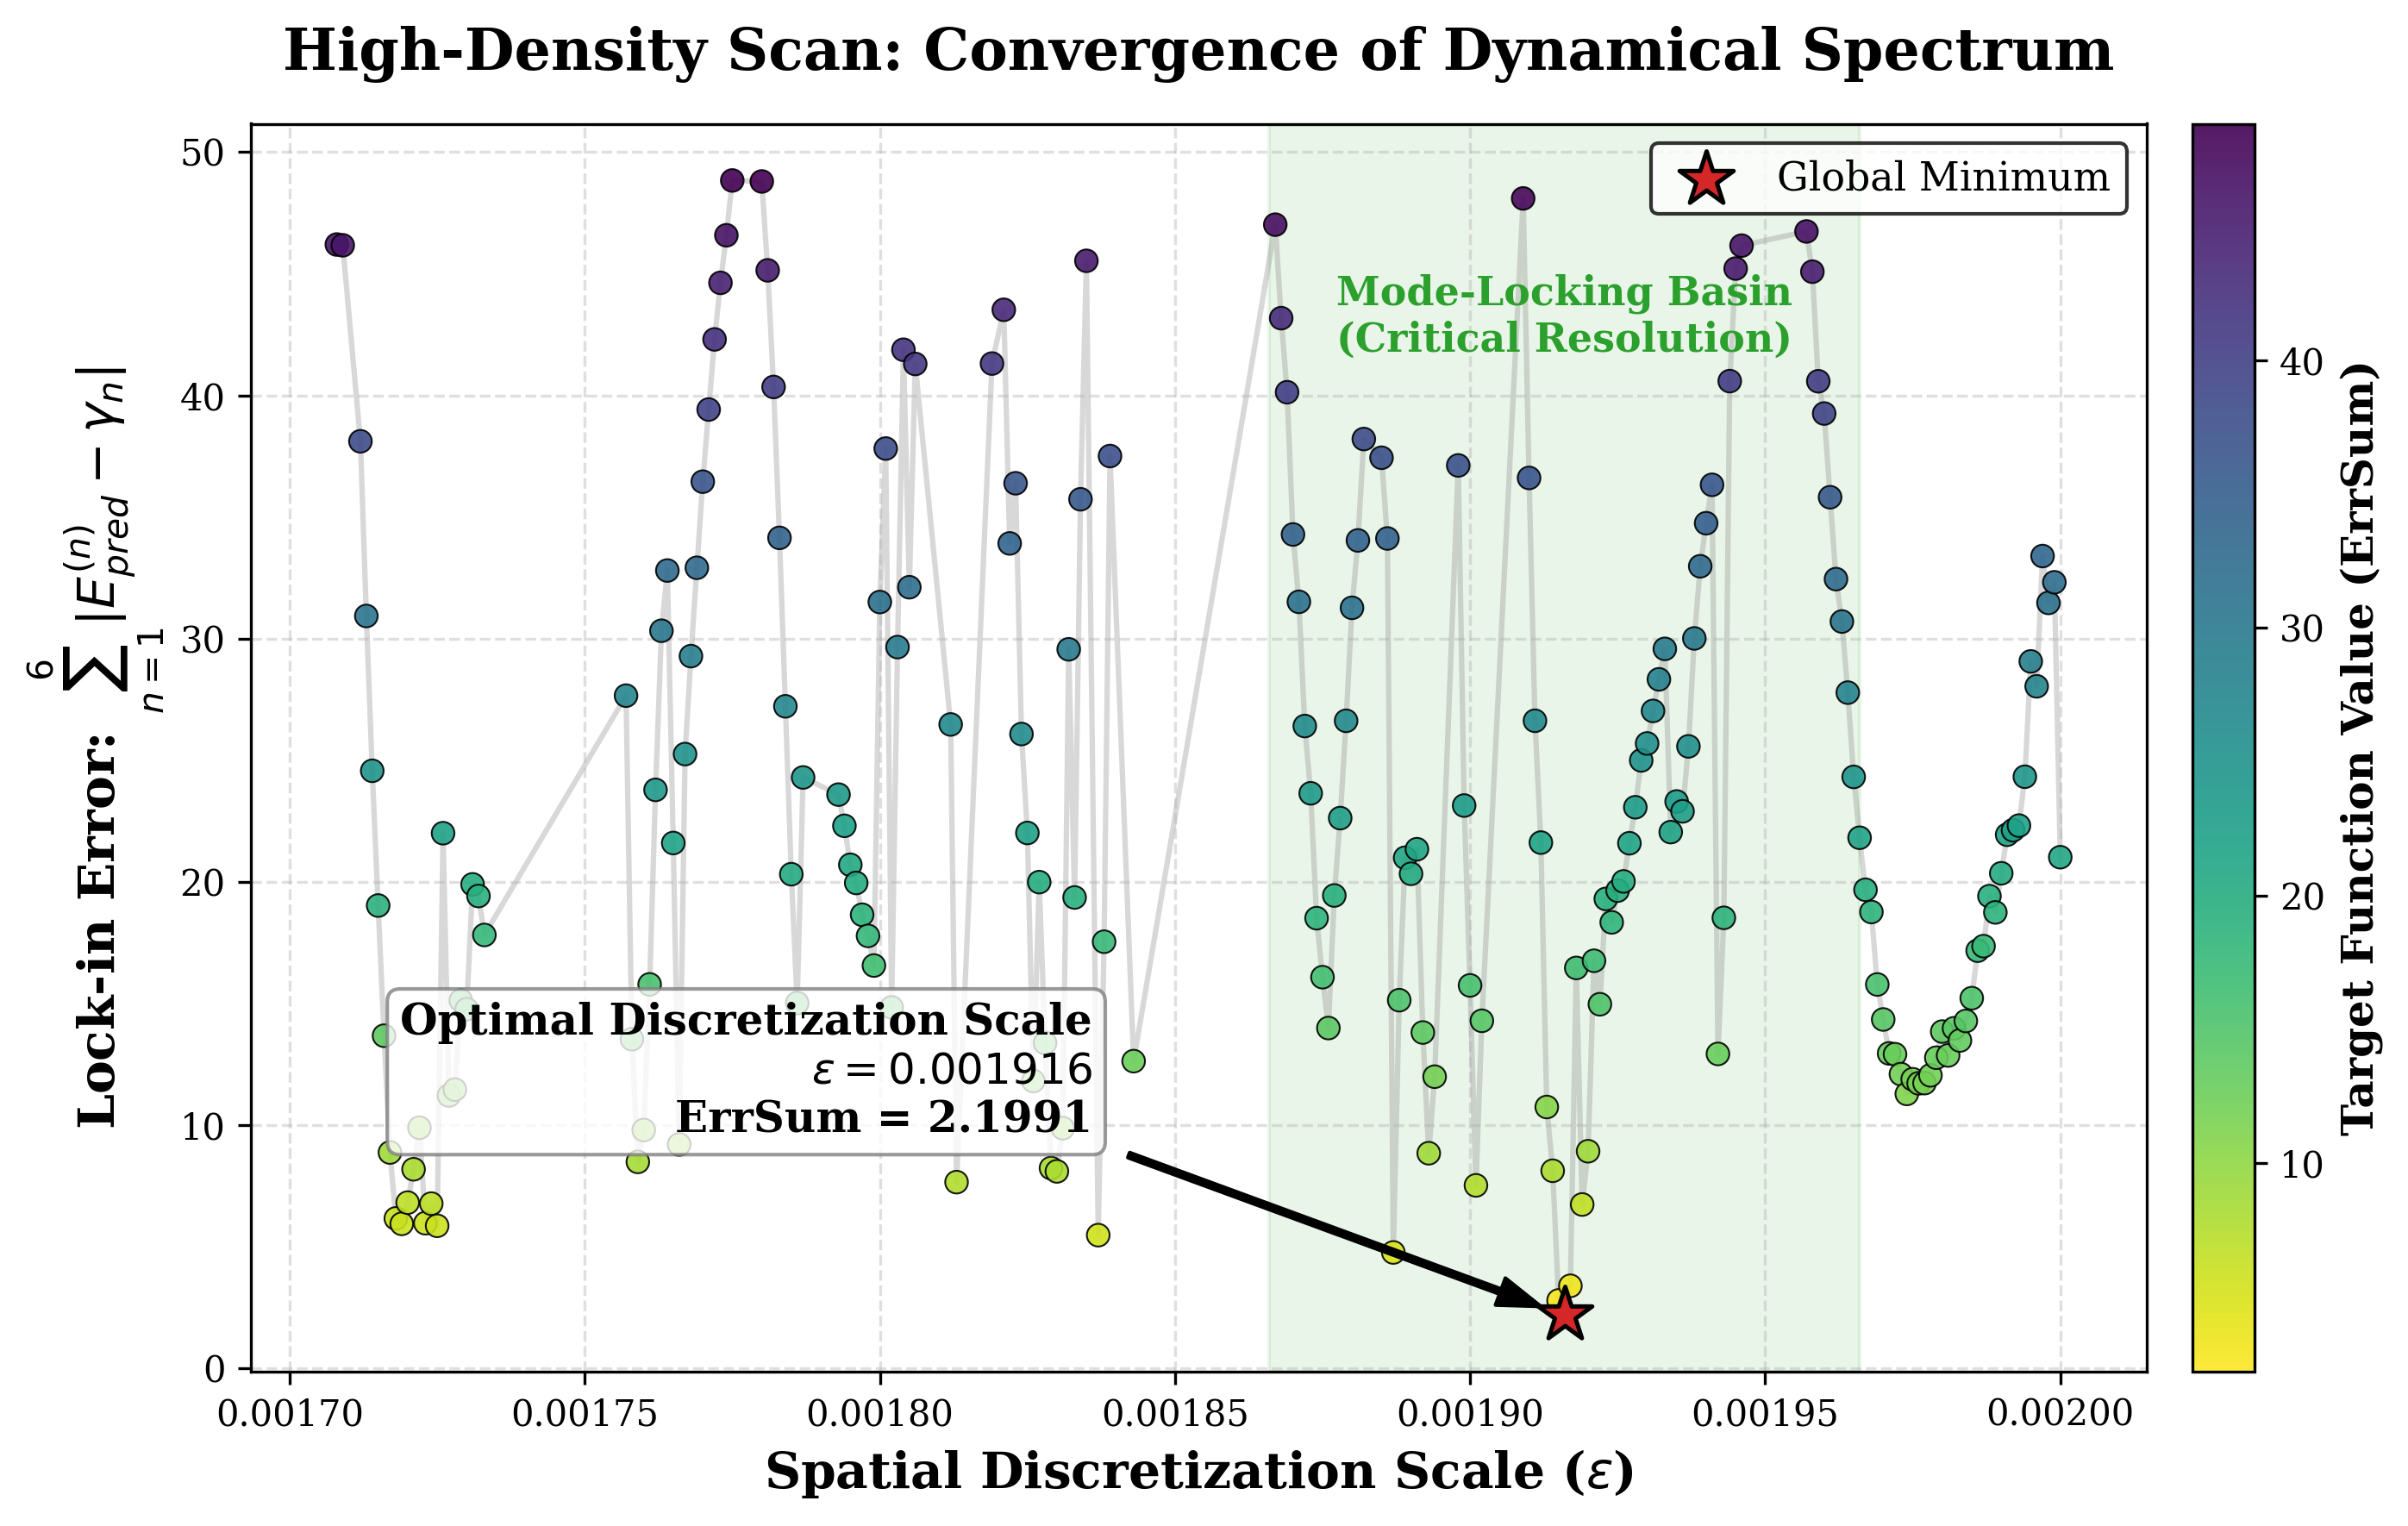

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

# ================= 1. 数据自动解析 =================
raw_log = """
ε = 0.000650  | ErrSum: 41.2982  | 
ε = 0.000651  | ErrSum: 41.5712  | 
ε = 0.000653  | ErrSum: 30.1172  | 
ε = 0.000654  | ErrSum: 25.5964  | 
ε = 0.000655  | ErrSum: 31.0790  | 
ε = 0.000656  | ErrSum: 34.3839  | 
ε = 0.000657  | ErrSum: 39.8045  | 
ε = 0.000658  | ErrSum: 47.6083  | 
ε = 0.000667  | ErrSum: 34.1094  | 
ε = 0.000668  | ErrSum: 36.1637  | 
ε = 0.000669  | ErrSum: 33.8780  | 
ε = 0.000670  | ErrSum: 31.4054  | 
ε = 0.000671  | ErrSum: 28.9237  | 
ε = 0.000672  | ErrSum: 25.9491  | 
ε = 0.000673  | ErrSum: 22.3051  | 
ε = 0.000674  | ErrSum: 18.2467  | 
ε = 0.000675  | ErrSum: 13.9873  | 
ε = 0.000676  | ErrSum: 15.3494  | 
ε = 0.000678  | ErrSum: 26.3452  | 
ε = 0.000679  | ErrSum: 16.3380  | 
ε = 0.000680  | ErrSum: 9.5301   | 
ε = 0.000681  | ErrSum: 9.3453   | 
ε = 0.000682  | ErrSum: 14.7787  | 
ε = 0.000683  | ErrSum: 22.0714  | 
ε = 0.000684  | ErrSum: 41.0046  | 
ε = 0.000687  | ErrSum: 24.3383  | 
ε = 0.000688  | ErrSum: 29.5317  | 
ε = 0.000689  | ErrSum: 26.8948  | 
ε = 0.000690  | ErrSum: 22.2344  | 
ε = 0.000691  | ErrSum: 23.3025  | 
ε = 0.000696  | ErrSum: 36.2905  | 
ε = 0.000697  | ErrSum: 46.0623  | 
ε = 0.000700  | ErrSum: 39.0470  | 
ε = 0.000712  | ErrSum: 14.8710  | 
ε = 0.000713  | ErrSum: 19.0791  | 
ε = 0.000714  | ErrSum: 29.8595  | 
ε = 0.000715  | ErrSum: 36.1185  | 
ε = 0.000716  | ErrSum: 41.5982  | 
ε = 0.000717  | ErrSum: 46.7819  | 
ε = 0.000721  | ErrSum: 48.1446  | 
ε = 0.000722  | ErrSum: 45.3394  | 
ε = 0.000723  | ErrSum: 48.7693  | 
ε = 0.000724  | ErrSum: 36.3227  | 
ε = 0.000725  | ErrSum: 20.5267  | 
ε = 0.000726  | ErrSum: 6.1813   | 
ε = 0.000729  | ErrSum: 45.3849  | 
ε = 0.000730  | ErrSum: 41.0916  | 
ε = 0.000737  | ErrSum: 42.7669  | 
ε = 0.000738  | ErrSum: 33.1577  | 
ε = 0.000739  | ErrSum: 27.4747  | 
ε = 0.000740  | ErrSum: 21.2265  | 
ε = 0.000741  | ErrSum: 21.6695  | 
ε = 0.000742  | ErrSum: 23.7783  | 
ε = 0.000743  | ErrSum: 24.2884  | 
ε = 0.000744  | ErrSum: 22.4057  | 
ε = 0.000745  | ErrSum: 19.4818  | 
ε = 0.000748  | ErrSum: 11.9003  | 
ε = 0.000749  | ErrSum: 30.8192  | 
ε = 0.000750  | ErrSum: 36.2713  | 
ε = 0.001708  | ErrSum: 46.2010  | 
ε = 0.001709  | ErrSum: 46.1692  | 
ε = 0.001712  | ErrSum: 38.1127  | 
ε = 0.001713  | ErrSum: 30.9335  | 
ε = 0.001714  | ErrSum: 24.5701  | 
ε = 0.001715  | ErrSum: 19.0326  | 
ε = 0.001716  | ErrSum: 13.6818  | 
ε = 0.001717  | ErrSum: 8.8825   | 
ε = 0.001718  | ErrSum: 6.1721   | 
ε = 0.001719  | ErrSum: 5.9496   | 
ε = 0.001720  | ErrSum: 6.8214   | 
ε = 0.001721  | ErrSum: 8.1925   | 
ε = 0.001722  | ErrSum: 9.8992   | 
ε = 0.001723  | ErrSum: 5.9768   | 
ε = 0.001724  | ErrSum: 6.7803  | 
ε = 0.001725  | ErrSum: 5.8696   | 
ε = 0.001726  | ErrSum: 22.0052  | 
ε = 0.001727  | ErrSum: 11.2253  | 
ε = 0.001728  | ErrSum: 11.4661  | 
ε = 0.001729  | ErrSum: 15.1314  | 
ε = 0.001730  | ErrSum: 14.7706  | 
ε = 0.001731  | ErrSum: 19.9026  | 
ε = 0.001732  | ErrSum: 19.4238  | 
ε = 0.001733  | ErrSum: 17.8226  | 
ε = 0.001757  | ErrSum: 27.6592  | 
ε = 0.001758  | ErrSum: 13.5386  | 
ε = 0.001759  | ErrSum: 8.4965   | 
ε = 0.001760  | ErrSum: 9.8058   | 
ε = 0.001761  | ErrSum: 15.7908  | 
ε = 0.001762  | ErrSum: 23.7862  | 
ε = 0.001763  | ErrSum: 30.3259  | 
ε = 0.001764  | ErrSum: 32.8017  | 
ε = 0.001765  | ErrSum: 21.6014  | 
ε = 0.001766  | ErrSum: 9.2130   | 
ε = 0.001767  | ErrSum: 25.2573  | 
ε = 0.001768  | ErrSum: 29.2838  | 
ε = 0.001769  | ErrSum: 32.9148  | 
ε = 0.001770  | ErrSum: 36.4532  | 
ε = 0.001771  | ErrSum: 39.4182  | 
ε = 0.001772  | ErrSum: 42.3006  | 
ε = 0.001773  | ErrSum: 44.6252  | 
ε = 0.001774  | ErrSum: 46.5805  | 
ε = 0.001775  | ErrSum: 48.8342  | 
ε = 0.001780  | ErrSum: 48.7931  | 
ε = 0.001781  | ErrSum: 45.1395  | 
ε = 0.001782  | ErrSum: 40.3462  | 
ε = 0.001783  | ErrSum: 34.1443  | 
ε = 0.001784  | ErrSum: 27.2207  | 
ε = 0.001785  | ErrSum: 20.3202  | 
ε = 0.001786  | ErrSum: 15.0235  | 
ε = 0.001787  | ErrSum: 24.2971  | 
ε = 0.001793  | ErrSum: 23.5920  | 
ε = 0.001794  | ErrSum: 22.3089  | 
ε = 0.001795  | ErrSum: 20.7067  | 
ε = 0.001796  | ErrSum: 19.9607  | 
ε = 0.001797  | ErrSum: 18.6539  | 
ε = 0.001798  | ErrSum: 17.7855  | 
ε = 0.001799  | ErrSum: 16.5668  | 
ε = 0.001800  | ErrSum: 31.5064  | 
ε = 0.001801  | ErrSum: 37.8152  | 
ε = 0.001802  | ErrSum: 14.8462  | 
ε = 0.001803  | ErrSum: 29.6550  | 
ε = 0.001804  | ErrSum: 41.8761  | 
ε = 0.001805  | ErrSum: 32.1151  | 
ε = 0.001806  | ErrSum: 41.2921  | 
ε = 0.001812  | ErrSum: 26.4749  | 
ε = 0.001813  | ErrSum: 7.6632   | 
ε = 0.001819  | ErrSum: 41.3083  | 
ε = 0.001821  | ErrSum: 43.5184  | 
ε = 0.001822  | ErrSum: 33.9156  | 
ε = 0.001823  | ErrSum: 36.3877  | 
ε = 0.001824  | ErrSum: 26.0806  | 
ε = 0.001825  | ErrSum: 22.0148  | 
ε = 0.001826  | ErrSum: 11.8209  | 
ε = 0.001827  | ErrSum: 19.9945  | 
ε = 0.001828  | ErrSum: 13.3838  | 
ε = 0.001829  | ErrSum: 8.2405   | 
ε = 0.001830  | ErrSum: 8.1054   | 
ε = 0.001831  | ErrSum: 9.8817   | 
ε = 0.001832  | ErrSum: 29.5631  | 
ε = 0.001833  | ErrSum: 19.3633  | 
ε = 0.001834  | ErrSum: 35.7305  | 
ε = 0.001835  | ErrSum: 45.5316  | 
ε = 0.001837  | ErrSum: 5.4844   | 
ε = 0.001838  | ErrSum: 17.5446  | 
ε = 0.001839  | ErrSum: 37.5075  | 
ε = 0.001843  | ErrSum: 12.6367  | 
ε = 0.001867  | ErrSum: 47.0170  | 
ε = 0.001868  | ErrSum: 43.1741  | 
ε = 0.001869  | ErrSum: 40.1304  | 
ε = 0.001870  | ErrSum: 34.2833  | 
ε = 0.001871  | ErrSum: 31.5150  | 
ε = 0.001872  | ErrSum: 26.4100  | 
ε = 0.001873  | ErrSum: 23.6449  | 
ε = 0.001874  | ErrSum: 18.5128  | 
ε = 0.001875  | ErrSum: 16.0874  | 
ε = 0.001876  | ErrSum: 13.9964  | 
ε = 0.001877  | ErrSum: 19.4456  | 
ε = 0.001878  | ErrSum: 22.6252  | 
ε = 0.001879  | ErrSum: 26.6244  | 
ε = 0.001880  | ErrSum: 31.2684  | 
ε = 0.001881  | ErrSum: 34.0392  | 
ε = 0.001882  | ErrSum: 38.2066  | 
ε = 0.001885  | ErrSum: 37.4364  | 
ε = 0.001886  | ErrSum: 34.1190  | 
ε = 0.001887  | ErrSum: 4.7737   | 
ε = 0.001888  | ErrSum: 15.1420  | 
ε = 0.001889  | ErrSum: 20.9964  | 
ε = 0.001890  | ErrSum: 20.3365  | 
ε = 0.001891  | ErrSum: 21.3464  | 
ε = 0.001892  | ErrSum: 13.8131  | 
ε = 0.001893  | ErrSum: 8.8516   | 
ε = 0.001894  | ErrSum: 11.9973  | 
ε = 0.001898  | ErrSum: 37.1212  | 
ε = 0.001899  | ErrSum: 23.1420  | 
ε = 0.001900  | ErrSum: 15.7495  | 
ε = 0.001901  | ErrSum: 7.5301   | 
ε = 0.001902  | ErrSum: 14.2948  | 
ε = 0.001909  | ErrSum: 48.0955  | 
ε = 0.001910  | ErrSum: 36.6071  | 
ε = 0.001911  | ErrSum: 26.6264  | 
ε = 0.001912  | ErrSum: 21.6195  | 
ε = 0.001913  | ErrSum: 10.7517  | 
ε = 0.001914  | ErrSum: 8.1307   | 
ε = 0.001915  | ErrSum: 2.8013   | 
ε = 0.001916  | ErrSum: 2.1991   | 
ε = 0.001917  | ErrSum: 3.4026   | 
ε = 0.001918  | ErrSum: 16.4677  | 
ε = 0.001919  | ErrSum: 6.7448   | 
ε = 0.001920  | ErrSum: 8.9334   | 
ε = 0.001921  | ErrSum: 16.7622  | 
ε = 0.001922  | ErrSum: 14.9752  | 
ε = 0.001923  | ErrSum: 19.3042  | 
ε = 0.001924  | ErrSum: 18.3410  | 
ε = 0.001925  | ErrSum: 19.6460  | 
ε = 0.001926  | ErrSum: 20.0237  | 
ε = 0.001927  | ErrSum: 21.5926  | 
ε = 0.001928  | ErrSum: 23.0717  | 
ε = 0.001929  | ErrSum: 24.9982  | 
ε = 0.001930  | ErrSum: 25.6936  | 
ε = 0.001931  | ErrSum: 27.0308  | 
ε = 0.001932  | ErrSum: 28.3287  | 
ε = 0.001933  | ErrSum: 29.5821  | 
ε = 0.001934  | ErrSum: 22.0503  | 
ε = 0.001935  | ErrSum: 23.3086  | 
ε = 0.001936  | ErrSum: 22.9041  | 
ε = 0.001937  | ErrSum: 25.5741  | 
ε = 0.001938  | ErrSum: 30.0111  | 
ε = 0.001939  | ErrSum: 32.9770  | 
ε = 0.001940  | ErrSum: 34.7460  | 
ε = 0.001941  | ErrSum: 36.3251  | 
ε = 0.001942  | ErrSum: 12.9332  | 
ε = 0.001943  | ErrSum: 18.5269  | 
ε = 0.001944  | ErrSum: 40.5869  | 
ε = 0.001945  | ErrSum: 45.2132  | 
ε = 0.001946  | ErrSum: 46.1555  | 
ε = 0.001957  | ErrSum: 46.7388  | 
ε = 0.001958  | ErrSum: 45.0842  | 
ε = 0.001959  | ErrSum: 40.5811  | 
ε = 0.001960  | ErrSum: 39.2540  | 
ε = 0.001961  | ErrSum: 35.8139  | 
ε = 0.001962  | ErrSum: 32.4487  | 
ε = 0.001963  | ErrSum: 30.7058  | 
ε = 0.001964  | ErrSum: 27.7831  | 
ε = 0.001965  | ErrSum: 24.3193  | 
ε = 0.001966  | ErrSum: 21.8183  | 
ε = 0.001967  | ErrSum: 19.6800  | 
ε = 0.001968  | ErrSum: 18.7662  | 
ε = 0.001969  | ErrSum: 15.7877  | 
ε = 0.001970  | ErrSum: 14.3489  | 
ε = 0.001971  | ErrSum: 12.9542  | 
ε = 0.001972  | ErrSum: 12.9208  | 
ε = 0.001973  | ErrSum: 12.1028  | 
ε = 0.001974  | ErrSum: 11.2903  | 
ε = 0.001975  | ErrSum: 11.8923  | 
ε = 0.001976  | ErrSum: 11.7249  | 
ε = 0.001977  | ErrSum: 11.7341  | 
ε = 0.001978  | ErrSum: 12.0531  | 
ε = 0.001979  | ErrSum: 12.7785  | 
ε = 0.001980  | ErrSum: 13.8522  | 
ε = 0.001981  | ErrSum: 12.8711  | 
ε = 0.001982  | ErrSum: 13.9864  | 
ε = 0.001983  | ErrSum: 13.4863  | 
ε = 0.001984  | ErrSum: 14.2882  | 
ε = 0.001985  | ErrSum: 15.2245  | 
ε = 0.001986  | ErrSum: 17.1768  | 
ε = 0.001987  | ErrSum: 17.3630  | 
ε = 0.001988  | ErrSum: 19.4188  | 
ε = 0.001989  | ErrSum: 18.7494  | 
ε = 0.001990  | ErrSum: 20.3577  | 
ε = 0.001991  | ErrSum: 21.9434  | 
ε = 0.001992  | ErrSum: 22.1290  | 
ε = 0.001993  | ErrSum: 22.3177  | 
ε = 0.001994  | ErrSum: 24.3262  | 
ε = 0.001995  | ErrSum: 29.0663  | 
ε = 0.001996  | ErrSum: 28.0429  | 
ε = 0.001997  | ErrSum: 33.3966  | 
ε = 0.001998  | ErrSum: 31.4708  | 
ε = 0.001999  | ErrSum: 32.3184  | 
ε = 0.002000  | ErrSum: 21.0182  | 
"""

eps_vals = []
err_sums = []
for match in re.finditer(r"ε\s*=\s*([0-9.]+)\s*\|\s*ErrSum:\s*([0-9.]+)", raw_log):
    eps_vals.append(float(match.group(1)))
    err_sums.append(float(match.group(2)))

eps_vals = np.array(eps_vals)
err_sums = np.array(err_sums)

# 仅绘制细扫区域的数据 (0.0017 - 0.0020)
mask = eps_vals > 0.001
fine_eps = eps_vals[mask]
fine_err = err_sums[mask]

# 找到全局最优解
best_idx = np.argmin(fine_err)
best_eps = fine_eps[best_idx]
best_err = fine_err[best_idx]

# ================= 2. 绘制顶级期刊审美的漏斗图 =================
plt.rcParams['font.family'] = 'serif'
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# 绘制数据散点与连线
ax.plot(fine_eps, fine_err, color='gray', alpha=0.3, linewidth=1.5, zorder=1)
scatter = ax.scatter(fine_eps, fine_err, c=fine_err, cmap='viridis_r', 
                     s=40, edgecolor='black', linewidth=0.5, zorder=2, alpha=0.9)

# 突出显示最优极小值 (红星)
ax.scatter([best_eps], [best_err], color='#D62728', s=250, marker='*', 
           edgecolor='black', linewidth=1.2, zorder=4, label='Global Minimum')

# 标注收敛盆地背景
ax.axvspan(best_eps - 0.00005, best_eps + 0.00005, color='#2CA02C', alpha=0.1, zorder=0)
ax.text(best_eps, 45, 'Mode-Locking Basin\n(Critical Resolution)', 
        ha='center', va='top', color='#2CA02C', fontweight='bold', fontsize=11)

# 详细箭头标注最优坐标
ax.annotate(f'Optimal Discretization Scale\n$\epsilon = {best_eps:.6f}$\nErrSum = {best_err:.4f}', 
            xy=(best_eps, best_err), xytext=(best_eps - 0.00008, best_err + 10),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            fontsize=12, fontweight='bold', ha='right', va='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label(r'Target Function Value (ErrSum)', fontsize=12, fontweight='bold')

# 图表装饰
ax.set_xlabel(r'Spatial Discretization Scale ($\epsilon$)', fontsize=14, fontweight='bold')
ax.set_ylabel(r'Lock-in Error: $\sum_{n=1}^{6} |E_{pred}^{(n)} - \gamma_n|$', fontsize=14, fontweight='bold')
ax.set_title('High-Density Scan: Convergence of Dynamical Spectrum', fontsize=16, pad=15, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper right', frameon=True, edgecolor='black', fontsize=11)

plt.tight_layout()
plt.show()